In [1]:
import diff_classifier.aws as aws
import diff_classifier.utils as ut
import diff_classifier.msd as msd
import diff_classifier.features as ft
import os
import os.path as op
import numpy as np
import numpy.ma as ma
import pandas as pd

In [2]:
remote_folder = "01_18_Experiment/P1"
filename = "Traj_P1_S1_L_0000_1_1.csv"
to_download = op.join(remote_folder, filename)
to_download

'01_18_Experiment/P1/Traj_P1_S1_L_0000_1_1.csv'

In [3]:
local_folder = !pwd
local_name = op.join(local_folder[0], filename)
local_name

'/home/ubuntu/source/diff-classifier/notebooks/Traj_P1_S1_L_0000_1_1.csv'

In [ ]:
aws.download_s3(to_download, local_name)

In [4]:
test = ut.csv_to_pd(local_name)

In [5]:
msds_a = msd.all_msds(test)

/home/ubuntu/source/diff-classifier/diff_classifier/msd.py:129: RuntimeWarning: Mean of empty slice
  MSD[frame+1] = np.nanmean(x + y)
/home/ubuntu/source/diff-classifier/diff_classifier/msd.py:130: RuntimeWarning: Mean of empty slice
  gauss[frame+1] = np.nanmean(x**2 + y**2)/(2*(MSD[frame+1]**2))
/home/ubuntu/source/diff-classifier/diff_classifier/msd.py:130: RuntimeWarning: invalid value encountered in double_scalars
  gauss[frame+1] = np.nanmean(x**2 + y**2)/(2*(MSD[frame+1]**2))


In [6]:
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
string = 'elongation'

leveler = test_ft[string]
t_min = np.min(leveler)
t_max = np.max(leveler)*0.6

norm = mpl.colors.Normalize(t_min, t_max, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.viridis)

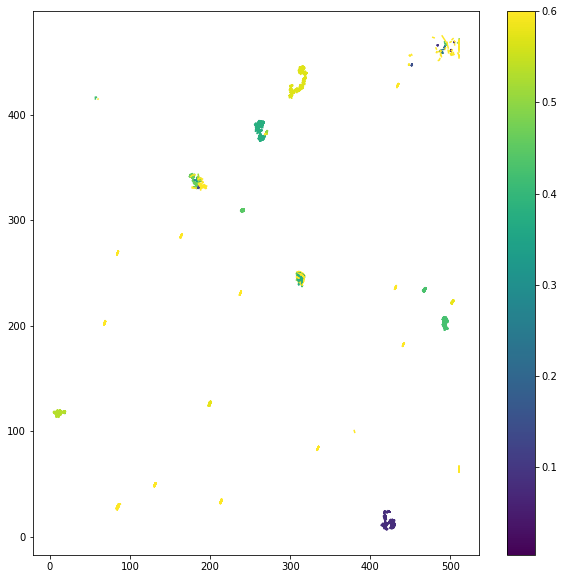

In [17]:
cutoff = 6

plt.figure(figsize=(10, 10))
for i in np.unique(msds_a['Track_ID']):
    param = test_ft[test_ft['Track_ID']==i][string][i-1]
    if msds_a[msds_a['Track_ID']==i]['X'].shape[0]> cutoff:
        if type(param) is np.float64:
            x = msds_a[msds_a['Track_ID']==i]['X']
            y = msds_a[msds_a['Track_ID']==i]['Y']
            level = mapper.to_rgba(param)
            plt.plot(x, y, color=level)
mapper.set_array(30)
plt.colorbar(mapper)

In [24]:
xs = test_ft['X'].astype(int)
ys = test_ft['Y'].astype(int)
zs = test_ft[string]
image = np.zeros((512, 512))*np.nan
image[xs, ys] = zs

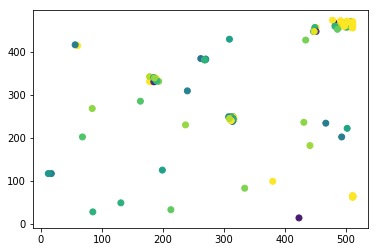

In [23]:
plt.scatter(xs, ys, c=zs)

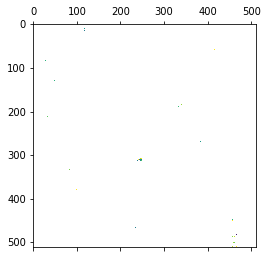

In [25]:
plt.matshow(image)

In [7]:
test_ft = ft.calculate_features(msds_a)
test_ft

/home/ubuntu/source/diff-classifier/diff_classifier/features.py:458: RuntimeWarning: divide by zero encountered in double_scalars
  ar = width/height
/usr/local/lib/python2.7/dist-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/ubuntu/source/diff-classifier/diff_classifier/features.py:651: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = (df['MSDs'][n1]/df['MSDs'][n2]) - (df['Frame'][n1]/df['Frame'][n2])
/home/ubuntu/source/diff-classifier/diff_classifier/features.py:273: RuntimeWarning: invalid value encountered in double_scalars
  a1 = (l1**2 - l2**2)**2/(l1**2 + l2**2)**2
/home/ubuntu/source/diff-classifier/diff_classifier/features.py:274: RuntimeWarning: invalid value encountered in double_scalars
  a2 = l2/l1
/home/ubuntu/source/diff-classifier/diff_classifier/features.py:275: RuntimeWarning: invalid value encountered in double_scalars
  a3 = -np.log(1-((l1-l2)**2)/

Optimal parameters not found. Print NaN instead.


,AR,D_fit,MSD_ratio,Track_ID,X,Y,alpha,asymmetry1,asymmetry2,asymmetry3,boundedness,efficiency,elongation,fractal_dim,kurtosis,straightness,trappedness
0,2.385923,2.745075e-05,0.010192,1.0,502.407195,222.694448,1.817502e+00,0.980276,7.057036e-02,0.472974,0.012547,0.112261,0.580875,2.755645,2.798434,0.014845,-0.223418
1,1.800787,5.072603e-03,0.014150,2.0,240.279156,309.180061,9.858791e-01,0.910898,1.527316e-01,0.314874,0.009258,0.117078,0.444687,2.431090,1.395322,0.015503,-0.224429
2,1.607096,7.334853e-02,0.000931,3.0,262.580105,384.876076,1.043486e+00,0.762680,2.600499e-01,0.189255,0.004644,0.515828,0.377759,2.063893,1.912280,0.032463,-0.225849
3,2.803251,8.383453e-03,0.046400,4.0,85.268847,28.731992,9.330446e-01,0.959567,1.015766e-01,0.404343,0.011142,0.047465,0.643271,2.461899,2.976094,0.009975,-0.223850
4,2.328643,5.986011e-01,-0.000219,5.0,309.924862,429.637603,8.589820e-01,0.881398,1.776257e-01,0.279495,0.001525,0.633964,0.570565,1.760238,2.215106,0.035912,-0.226810
5,1.727690,1.781342e-01,0.661570,6.0,17.901887,117.377434,6.400419e-02,0.801093,2.353464e-01,0.212658,0.212123,0.114084,0.421192,2.221173,2.926504,0.132439,-0.163603
6,1.088464,3.701096e-01,0.006276,7.0,423.484507,14.778498,7.703268e-01,0.381842,4.859470e-01,0.061703,0.004060,0.246394,0.081274,2.036279,3.000229,0.022596,-0.226029
7,4.903181,2.445506e-06,0.000434,8.0,434.200886,427.830918,2.180668e+00,0.998499,1.938073e-02,0.621196,0.003861,0.303943,0.796051,2.230519,2.024565,0.024537,-0.226090
8,3.051743,3.282455e-01,0.000000,9.0,315.944370,249.144303,2.535409e-08,0.933881,1.307662e-01,0.350209,0.214168,0.137236,0.672318,2.035495,1.500000,0.264641,-0.163005
9,inf,1.716429e-01,0.926671,10.0,511.000000,65.000000,6.277594e-02,1.000000,0.000000e+00,0.693147,0.060634,0.017544,1.000000,2.220496,4.676264,0.024390,-0.208730


In [ ]:
ma.comp

In [ ]:
unmask_track(msds_a[msds_a['Track_ID']==50])